# Итоговый проект

## Вариант 2

1. Задать уравнения кривой второго порядка и поверхности второго порядка в символьном виде.
2. Построить графики заданной кривой и поверхности. Обратить внимание на расположение координаты 0, 0.
3. Привести аналитически (например, методом ортогонального преобразования) квадратичные формы, описывающие кривую и поверхность второго порядка к каноническому виду.
4. Построить графики приведенных к каноническому виду кривой и поверхности второго порядка. 
5. Сделать выводы, оформить блокнот.

## Уравнения
Кривая: $y^2 - x^2/8 - 2x + 3 = 0$ 
   
Поверхность: $-2x^2 + y^2 + z^2 + 4xy + 4xz + yz = 0$

## Выполнение работы
Объявим необходимые переменные и зададим уравнения кривой и поверхности в символьном виде:

In [5]:
x, y, z = var('x y z')
curve   = y^2 - x^2/8 - 2*x + 3 == 0 # кривая
surface = -2*x^2 + y^2 + z^2 + 4*x*y + 4*x*z + y*z == 0 # поверхность

**Построим график кривой $ y^2 + x^2/8 - 2x + 3 = 0 $ и нанесем на график черным цветом точку (0; 0):**

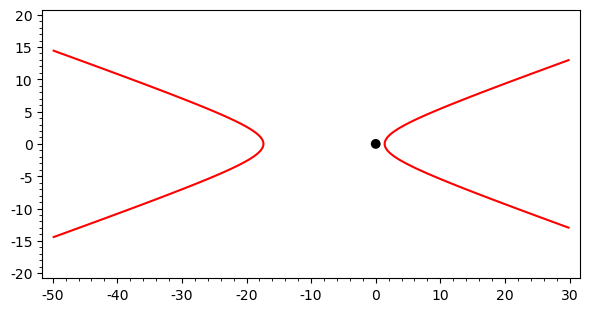

In [11]:
g = Graphics() 
g += point((0, 0), size = 50, color = 'black') # точка (0; 0)
g += implicit_plot( # построенная кривая
    curve, (x, -50, 30), (y, -20, 20), 
    color = 'red'
)
g.show()

**Построим график поверхности $-2x^2 + y^2 + z^2 + 4xy + 4xz + yz = 0$:**

In [6]:
implicit_plot3d(
    surface,
    (x, -15, 15), (y, -15, 15), (z, -15, 15),
    view = 'threejs',
    adapt = 'true'
)

Graphics3d Object

**Найдем горизонтальные и наклонные ассимптоты для данного графика:**

Подставим функцию $ y = kx + b $ в функцию кривой $ y^2 + x^2/8 - 2x + 3 = 0 $

In [14]:
k, b = var('k b')
assymptote = curve.subs(y == k*x + b).full_simplify().left() # подстановка y = kx+b в кривую
pretty_print(assymptote)

1/8*(8*k^2 - 1)*x^2 + b^2 + 2*(b*k - 1)*x + 3

Приравняем коэффициенты перед $ x^2 $ и $ x $ к нулю и решим систему уравнений

In [22]:
assymp_coef = [] # список уравнений для нахождения коэффициентов ассимптоты 
assymp_coef.append( assymptote.coefficient(x, 2) == 0 )

assymp_coef.append( assymptote.coefficient(x, 1) == 0 )

coef = solve(assymp_coef, [k, b]) # решаем систему уравнений
pretty_print(coef) # коэффициенты прямых - наклонных ассимптот к графику

[[k == -1/4*sqrt(2), b == -2*sqrt(2)], [k == 1/4*sqrt(2), b == 2*sqrt(2)]]

**Найдем вертикальные ассимптоты для графика кривой:**

Подставим x = a в функцию кривой $ y^2 + x^2/8 - 2x + 3 = 0 $

In [16]:
a = var('a')
assymptote_vert = curve.subs(x == a).simplify().left() # подстановка x = a в кривую
pretty_print(assymptote_vert)

-1/8*a^2 + y^2 - 2*a + 3

Для существования вертикальной ассимптоты коэффициент перед $ y^2 $ должен равняться 0.

Если данное условие выполнено, то коэффициент $ a $ можно получить, если приравнять коэффициент перед y к 0

In [17]:
has_assymp_vert = bool(assymptote_vert.coefficient(y, 2) == 0) # проверка существования вертикальной ассимптоты
assymp_vert_coef = assymptote_vert.coefficient(y, 1)
if has_assymp_vert:
    pretty_print(x == assymp_vert_coef)
else:
    print("Вертикальная ассимптота к графику отсутствует")

Вертикальная ассимптота к графику отсутствует


**Нанесем на график ассимптоты и их точку пересечения:**

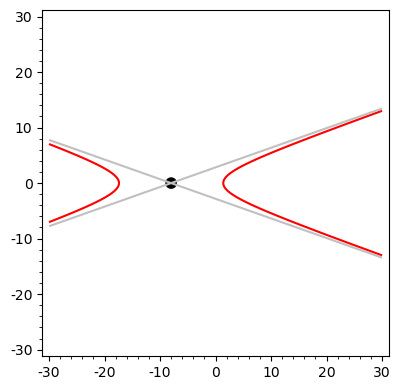

In [21]:
assymp_list = []
for hassymp in coef:
    assymp_list.append((k*x + b).subs(hassymp))

# Находим точку пересечения двух горизонтальных ассимптот
has_intersection = False
if len(assymp_list) >= 2:
    assymp_intersection = solve(assymp_list[0] == assymp_list[1], x)
    if assymp_intersection:
        assymp_intersection = assymp_intersection[0].right()
        has_intersection = True

# Добавляем в список вертикальную ассимптоту, если она существует
if has_assymp_vert:
    assymp_list.append(x == vassymptote_equation)

g = Graphics()
g += implicit_plot( # график кривой
    curve, (x, -30, 30), (y, -30, 30), 
    color='red' 
    )

# Отображение ассимптот
for assymp in assymp_list:
    g += implicit_plot(
        y == assymp, (x, -30, 30), (y, -15, 15),
        color='#c0c0c0'
    )
    
# Отображение точки пересечения горизонтальных ассимптот
if has_intersection:
    g += point(
        (assymp_intersection, assymp_list[0](assymp_intersection)),
        size=70,
        color='black'
    )
g.show()

### Приведение уравнения кривой к каноническому виду 

Рассмотрим уравнение кривой $ y^2 + x^2/8 - 2x + 3 = 0 $ в качестве суммы квадратичной формы и линейного функционала:

Часть уравнения, являющаяся квадратичной формой:
$$ y^2 + x^2/8 $$
Часть уравнения, являющаяся линейным функционалом:
$$ -2x + 3 $$
Введем также вектор $v$:
$$ v = v_e = (x, y)^T $$
Теперь уравнение кривой можно представить в виде
$$ v^T * Q * v + L * v = 0, $$
где Q - матрица квадратичной формы, L - вектор, отвечающий за линейную часть уравнения

**Построение матриц квадратичной формы и линейного функционала:**

In [23]:
Q_lines = [] # строки матрицы квадратичной формы для кривой
for var1 in [x, y]:
    Q_line = [] # новая строка в матрице квадратичной формы
    for var2 in [x, y]:
        el = curve.left().coefficient(var1*var2) # получаем коэффициент перед заданным мономом
        if var1 != var2: # если моном является произведением разных переменных, значение коэффициента перед ним делится на 2
            el = el / 2
        Q_line.append(el)
    Q_lines.append(Q_line) 
Q_mat = matrix(QQ, Q_lines) # составление матрицы квадратичной формы для кривой из полученных строк

L_line = [] # строка вектора линейного функционала для кривой
for var1 in [x, y]:
    el = curve.left().coefficient(var1) # получаем коэффициент перед заданным мономом
    for var_ex in [x, y]:
        if var1 != var_ex: # исключение коэффицента перед мономами, содержащими более одной переменной
            el = el.subs([var_ex == 0])
    L_line.append(el)
L_mat = matrix(L_line) # составление матрицы линейного функционала для кривой

print("Q = ")
pretty_print(Q_mat)

print("L = ")
pretty_print(L_mat)

Q = 


[-1/8    0]
[   0    1]

L = 


[-2  0]

**Найдем собственные числа и собственные векторы матрицы Q:**

In [24]:
Q_eval = Q_mat.eigenvalues() # получаем собственные числа
Q_evec = Q_mat.right_eigenvectors() # получаем собственные векторы
Q_evec = list(map(lambda v: v[1][0].normalized(), Q_evec)) 

print("Собственные числа матрицы Q:")
pretty_print(Q_eval)
print("Собственные векторы матрицы Q (нормированные):")
pretty_print(Q_evec)

Собственные числа матрицы Q:


[1, -1/8]

Собственные векторы матрицы Q (нормированные):


[(0, 1), (1, 0)]

**Проверим равенство норм всех собственных векторов 1 и составим матрицу перехода к базису из собственных векторов:**

In [25]:
print(
    "Равенство норм всех собственных векторов:", 
    bool(Q_evec[0].norm() == Q_evec[1].norm() == 1)
)

# Матрица ортогонального преобразования
tf_matrix = matrix(Q_evec).T
print("Матрица перехода к новому базису:")
pretty_print(tf_matrix)

# Применение ортогонального преобразования к квадратичной форме
Q_tfd = tf_matrix.transpose() * Q_mat * tf_matrix
print("Матрица квадратичной формы кривой в новом базисе:")
pretty_print(Q_tfd)

# Применение ортогонального преобразования к линейному функционалу
L_tfd = L_mat * tf_matrix
print("Матрица линейного функционала кривой в новом базисе:")
pretty_print(L_tfd)

Равенство норм всех собственных векторов: True
Матрица перехода к новому базису:


[0 1]
[1 0]

Матрица квадратичной формы кривой в новом базисе:


[   1    0]
[   0 -1/8]

Матрица линейного функционала кривой в новом базисе:


[ 0 -2]

**Запишем уравнение кривой после преобразований:**

Для этого выполним обратный переход от матриц к уравнению,
воспользуемся формулой $ v^T * Q * v + L * v = 0 $

In [27]:
base_vct = matrix([x, y]).T
tfd = base_vct.T * Q_tfd * base_vct + L_tfd * base_vct
tfd = tfd[0][0] == 0
pretty_print(tfd)


x^2 - 1/8*y^2 - 2*y == 0

**Теперь построим график кривой после преобразований:**

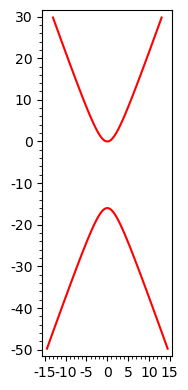

In [29]:
g = Graphics()
g += implicit_plot( # график кривой после преобразований
    tfd, (x, -15, 15), (y, -50, 30), 
    color='red' )
g.show()

Добавим на график ассимптоты и найдем точку их пересечения

In [31]:
assymptote2 = tfd.subs(y == k*x + b).full_simplify().left() # подстановка y = kx+b в функцию кривой после преобразований
hassymptote_coef = [] # список уравнений для нахождения коэффициентов ассимптоты 
hassymptote_coef.append(
    assymptote2.coefficient(x, 2) == 0
)
hassymptote_coef.append(
    assymptote2.coefficient(x, 1) == 0
)
hcoef = solve(hassymptote_coef, [k, b])

assymp_vert = tfd.subs(x == a).simplify().left() # подстановка x = a в функцию кривой после преобразований
has_assymp_vert = bool(assymp_vert.coefficient(y, 2) == 0) # проверка существования вертикальной ассимптоты
assymp_vert_coef = assymp_vert.coefficient(y, 1)
if has_assymp_vert:
    pretty_print(x == assymp_vert_coef)
else:
    print("Вертикальная ассимптота к графику отсутствует")

assymp_list = []
for hassymp in hcoef:
    assymp_list.append((k*x + b).subs(hassymp))
    pretty_print(y == (k*x + b).subs(hassymp))

# Находим точку пересечения двух горизонтальных ассимптот
has_intersection = False
if len(assymp_list) >= 2:
    assymp_intersection = solve(assymp_list[0] == assymp_list[1], x)
    if assymp_intersection:
        assymp_intersection = assymp_intersection[0].right()
        has_intersection = True

# Добавляем в список вертикальную ассимптоту, если она существует
if has_assymp_vert:
    assymp_list.append(x == assymp_vert)

Вертикальная ассимптота к графику отсутствует


y == -2*sqrt(2)*x - 8

y == 2*sqrt(2)*x - 8

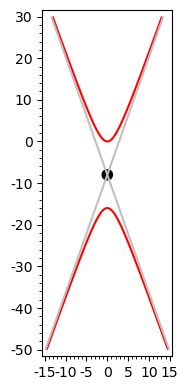

In [37]:
g = Graphics()
g += implicit_plot( # график кривой после преобразований
    tfd, (x, -15, 15), (y, -50, 30), 
    color='red')

# Отображение ассимптот
for assymp in assymp_list:
    g += implicit_plot(
        y == assymp, (x, -15, 15), (y, -50, 30),
        color='#c0c0c0')
    
# Отображение точки пересечения горизонтальных ассимптот
if has_intersection:
    g += point(
        (assymp_intersection, assymp_list[0](assymp_intersection)),
        size=70,
        color='black'
    )
g.show()

Путем параллельного сдвига отцентрируем график

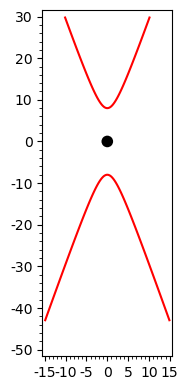

In [38]:
cnl = tfd.subs([
    x == x + assymp_intersection, 
    y == y + assymp_list[0](assymp_intersection)
]) # Параллельный сдвиг графика

g = Graphics()
g += point((0, 0), size=70, color="black")
g += implicit_plot( # Отрисовка графика в канонической форме
    cnl, (x, -15, 15), (y, -50, 30),
    color='red')
g.show()

### Приведение уравнения поверхности к каноническому виду

Рассмотрим уравнение поверхности $ -2x^2 + y^2 + z^2 + 4xy + 4xz + yz = 0 $ в качестве квадратичной формы:
Введем вектор $v$:
$$ v = v_e = (x, y, z)^T $$
Теперь уравнение поверхности можно представить в виде
$$ v^T * Q * v = 0, $$
где Q - матрица квадратичной формы

**Построение матрицы квадратичной формы:**

In [40]:
surface_Qs = [] # строки матрицы квадратичной формы для поверхности
for var1 in [x, y, z]:
    surface_Q = []
    for var2 in [x, y, z]:
        el = surface.left().coefficient(var1*var2) # получаем коэффициент перед заданным мономом
        if var1 != var2: # если моном является произведением разных переменных, значение коэффициента перед ним делится на 2
            el = el / 2
        surface_Q.append(el)
    surface_Qs.append(surface_Q)
surf_Q = matrix(QQ, surface_Qs) # составление матрицы квадратичной формы для поверхности из полученных строк

print("Q = ")
pretty_print(surf_Q)

Q = 


[ -2   2   2]
[  2   1 1/2]
[  2 1/2   1]

**Найдем собственные числа и собственные векторы матрицы Q:**

In [52]:
surf_Q_eval = surf_Q.eigenvalues() # получаем собственные числа
__surface_Q_evec = surf_Q.right_eigenvectors() # получаем собственные векторы
surf_Q_evec = []

for eigen_set in __surface_Q_evec:
    for vct in eigen_set[1]:
        surf_Q_evec.append(vct.normalized())
    
print("Собственные числа матрицы Q:")
pretty_print(surf_Q_eval)
print("Собственные векторы матрицы Q (нормированные):")
pretty_print(surf_Q_evec)

Собственные числа матрицы Q:


[1/2, -3.576033673912518?, 3.076033673912518?]

Собственные векторы матрицы Q (нормированные):


[(0, 1/2*sqrt(2), -1/2*sqrt(2)),
 (0.8735422770541734?, -0.3441830110558988?, -0.3441830110558988?),
 (0.4867482821736610?, 0.6176876677581438?, 0.6176876677581438?)]

**Проверим равенство норм всех собственных векторов 1 и составим матрицу перехода к базису из собственных векторов:**

In [54]:
print(
    "Равенство норм всех собственных векторов:", 
    bool(surf_Q_evec[0].norm() == surf_Q_evec[1].norm() == surf_Q_evec[2].norm() == 1)
)

# Матрица ортогонального преобразования
surf_tfm_matr = matrix(surf_Q_evec).T
print("Матрица перехода к новому базису:")
pretty_print(surf_tfm_matr)
# Применение ортогонального преобразования к квадратичной форме

surf_Q_tfd = surf_tfm_matr.inverse() * surf_Q * surf_tfm_matr
print("Матрица квадратичной формы поверхности в новом базисе:")
pretty_print(surf_Q_tfd)

Равенство норм всех собственных векторов: True
Матрица перехода к новому базису:


[                   0  0.8735422770541734?  0.4867482821736610?]
[         1/2*sqrt(2) -0.3441830110558988?  0.6176876677581438?]
[        -1/2*sqrt(2) -0.3441830110558988?  0.6176876677581438?]

Матрица квадратичной формы поверхности в новом базисе:


[                1/2                   0                   0]
[                  0 -3.576033673912518?                   0]
[                  0                   0  3.076033673912518?]

**Получим из квадратичной формы уравнение поверхности:**

Для этого выполним обратный переход от матрицы к уравнению,
воспользуемся формулой $ v^T * Q * v = 0 $

In [56]:
surf_base_vct = matrix([x, y, z]).T
surface_tfd = surf_base_vct.T * surf_Q_tfd * surf_base_vct # уравнение поверхности после ортогонального преобразования
surface_tfd = surface_tfd[0][0] == 0
pretty_print(surface_tfd)

1/2*x^2 - 3.576033673912518?*y^2 + 3.076033673912518?*z^2 == 0

**Наконец, посторим график поверхности в каноническом виде:**

In [57]:
implicit_plot3d(
    surface_tfd,
    (x, -15, 15), (y, -15, 15), (z, -15, 15),
    view='threejs',
    adapt='true'
)

Graphics3d Object

Выводы:
В ходе выполнения работы были закреплены практические умения работы с системой компьютерной алгебры SageMath.

В ходе выполнения работы были построены графики функций, задающих кривую и поверхность второго порядка. Также данные функции были приведены к каноническому виду, а для графика кривой были также найдены ассимптоты и точка пересечения этих ассимптот.